In [1]:
## Accessing the Files

#You can access the code and data files for this project on GitHub:

#- [GitHub Repository](https://github.com/AtodariaTMU/Toronto-Housing-Market)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file and store it in a DataFrame
file_path = 'mls.csv'
df = pd.read_csv(file_path) 

def check_df(dataframe, head=5):
    print(" SHAPE ".center(70, '#'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" INFO ".center(70, '#'))
    print(dataframe.info())
    print(" MISSING VALUES ".center(70, '#'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70, '#'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70, '#'))
    print(dataframe.describe().T)


check_df(df)

############################### SHAPE ################################
Rows: 5091
Columns: 17
################################ INFO ################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5091 non-null   object 
 1   CompIndex          5076 non-null   float64
 2   CompBenchmark      5076 non-null   float64
 3   CompYoYChange      5076 non-null   float64
 4   SFDetachIndex      5076 non-null   float64
 5   SFDetachBenchmark  5076 non-null   float64
 6   SFDetachYoYChange  5075 non-null   float64
 7   SFAttachIndex      4949 non-null   float64
 8   SFAttachBenchmark  4949 non-null   float64
 9   SFAttachYoYChange  4951 non-null   float64
 10  THouseIndex        3803 non-null   float64
 11  THouseBenchmark    3803 non-null   float64
 12  THouseYoYChange    3804 non-null   float64
 13  Apa

In [3]:
# 1. Handle missing values
# Drop missing value fill with mean, median, or mode)
df.dropna(inplace=True)

# 2. Convert data types if necessary
# In this case, we will convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# 3. Handle outliers (example: IQR method for 'CompIndex')
Q1 = df['CompIndex'].quantile(0.25)
Q3 = df['CompIndex'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
df = df[(df['CompIndex'] >= lower_bound) & (df['CompIndex'] <= upper_bound)]
print(df) 
# 4. Normalize or scale features (if necessary)
#  we will normalize the 'CompIndex' column using Min-Max normalization
from sklearn.preprocessing import MinMaxScaler

# Select the feature(s) to normalize
feature_to_normalize = ['CompIndex']

# Instantiate the scaler object
scaler = MinMaxScaler()

# Fit and transform the data
df[feature_to_normalize] = scaler.fit_transform(df[feature_to_normalize])

 

         Location  CompIndex  CompBenchmark  CompYoYChange  SFDetachIndex  \
69           Ajax      179.8       444300.0          16.00          178.8   
70           Ajax      180.4       445800.0          16.31          179.2   
71           Ajax      182.8       451700.0          15.55          181.4   
72           Ajax      183.8       454200.0          15.74          182.3   
73           Ajax      182.1       450000.0          12.69          180.3   
...           ...        ...            ...            ...            ...   
5086  York Region      287.0       970300.0          11.76          292.0   
5087  York Region      289.5       978700.0          12.56          295.2   
5088  York Region      294.9       997000.0          13.34          301.7   
5089  York Region      309.9      1047700.0          17.16          318.6   
5090  York Region      324.1      1095700.0          19.82          334.4   

      SFDetachBenchmark  SFDetachYoYChange  SFAttachIndex  SFAttachBenchmar

In [4]:
#Import our housing data into Pandas
HousingData = pd.read_csv("MLS.csv")
print(HousingData.shape)
HousingData.head() 
print(df) 
HousingData.isna().sum() 

(5091, 17)
         Location  CompIndex  CompBenchmark  CompYoYChange  SFDetachIndex  \
69           Ajax   0.175214       444300.0          16.00          178.8   
70           Ajax   0.178063       445800.0          16.31          179.2   
71           Ajax   0.189459       451700.0          15.55          181.4   
72           Ajax   0.194207       454200.0          15.74          182.3   
73           Ajax   0.186135       450000.0          12.69          180.3   
...           ...        ...            ...            ...            ...   
5086  York Region   0.684236       970300.0          11.76          292.0   
5087  York Region   0.696106       978700.0          12.56          295.2   
5088  York Region   0.721747       997000.0          13.34          301.7   
5089  York Region   0.792972      1047700.0          17.16          318.6   
5090  York Region   0.860399      1095700.0          19.82          334.4   

      SFDetachBenchmark  SFDetachYoYChange  SFAttachIndex  SFAtt

Location                0
CompIndex              15
CompBenchmark          15
CompYoYChange          15
SFDetachIndex          15
SFDetachBenchmark      15
SFDetachYoYChange      16
SFAttachIndex         142
SFAttachBenchmark     142
SFAttachYoYChange     140
THouseIndex          1288
THouseBenchmark      1288
THouseYoYChange      1287
ApartIndex           1081
ApartBenchmark       1081
ApartYoYChange       1083
Date                    0
dtype: int64

In [5]:
HousingData.Location.unique() 

array(['Adjala-Tosorontio', 'Ajax', 'Aurora', 'Barrie', 'Bradford West',
       'Bradford West Gwillimbury', 'Brampton', 'Brock', 'Burlington',
       'Caledon', 'City of Toronto', 'Clarington', 'Dufferin County',
       'Durham Region', 'EGswsiallimbury', 'East Gwillimbury', 'Essa',
       'GEswsiallimbury', 'Georgina', 'Halton Hills', 'Halton Region',
       'Innisfil', 'King', 'Markham', 'Milton', 'Mississauga',
       'New Tecumseth', 'Newmarket', 'Oakville', 'Orangeville', 'Oshawa',
       'Peel Region', 'Pickering', 'Richmond Hill', 'Scugog',
       'Simcoe County', 'TREB Total', 'Toronto C01', 'Toronto C02',
       'Toronto C03', 'Toronto C04', 'Toronto C06', 'Toronto C07',
       'Toronto C08', 'Toronto C09', 'Toronto C10', 'Toronto C11',
       'Toronto C12', 'Toronto C13', 'Toronto C14', 'Toronto C15',
       'Toronto E01', 'Toronto E02', 'Toronto E03', 'Toronto E04',
       'Toronto E05', 'Toronto E06', 'Toronto E07', 'Toronto E08',
       'Toronto E09', 'Toronto E10', 'Toro

In [6]:
# Convert Date into Pandas Date Object
HousingData['Date'] = pd.to_datetime(HousingData['Date'], format='%Y-%m')


In [7]:
# Generate summary statistics
summary_stats = df.describe()
print(summary_stats)

         CompIndex  CompBenchmark  CompYoYChange  SFDetachIndex  \
count  3648.000000   3.648000e+03    3648.000000    3648.000000   
mean      0.500226   7.977442e+05       9.807256     249.776563   
std       0.185440   2.619130e+05       8.428596      39.578971   
min       0.000000   3.099000e+05     -19.580000     126.300000   
25%       0.374644   6.221000e+05       4.637500     228.000000   
50%       0.514245   7.523500e+05       9.160000     250.800000   
75%       0.622507   9.167000e+05      14.252500     275.625000   
max       1.000000   2.162900e+06      38.990000     380.500000   

       SFDetachBenchmark  SFDetachYoYChange  SFAttachIndex  SFAttachBenchmark  \
count       3.648000e+03        3648.000000    3648.000000       3.648000e+03   
mean        1.024441e+06           8.573712     248.344079       7.660010e+05   
std         3.636600e+05           9.994362      39.055297       2.322276e+05   
min         3.455000e+05         -21.320000     137.200000       2.86800

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                   CompIndex  CompBenchmark  CompYoYChange  SFDetachIndex  \
CompIndex           1.000000       0.324620      -0.016030       0.854821   
CompBenchmark       0.324620       1.000000      -0.107419       0.156587   
CompYoYChange      -0.016030      -0.107419       1.000000       0.091615   
SFDetachIndex       0.854821       0.156587       0.091615       1.000000   
SFDetachBenchmark   0.232403       0.864551      -0.050001       0.183471   
SFDetachYoYChange  -0.033444      -0.104609       0.903738       0.112949   
SFAttachIndex       0.869300       0.317627       0.092676       0.796458   
SFAttachBenchmark   0.327853       0.744917      -0.030826       0.218165   
SFAttachYoYChange  -0.004149      -0.099601       0.885237       0.098457   
THouseIndex         0.692637       0.236967      -0.037960       0.573138   
THouseBenchmark     0.243727       0.626291      -0.073826       0.139932   
THouseYoYChange    -0.002934      -0.109147       0.574179       0.058187   

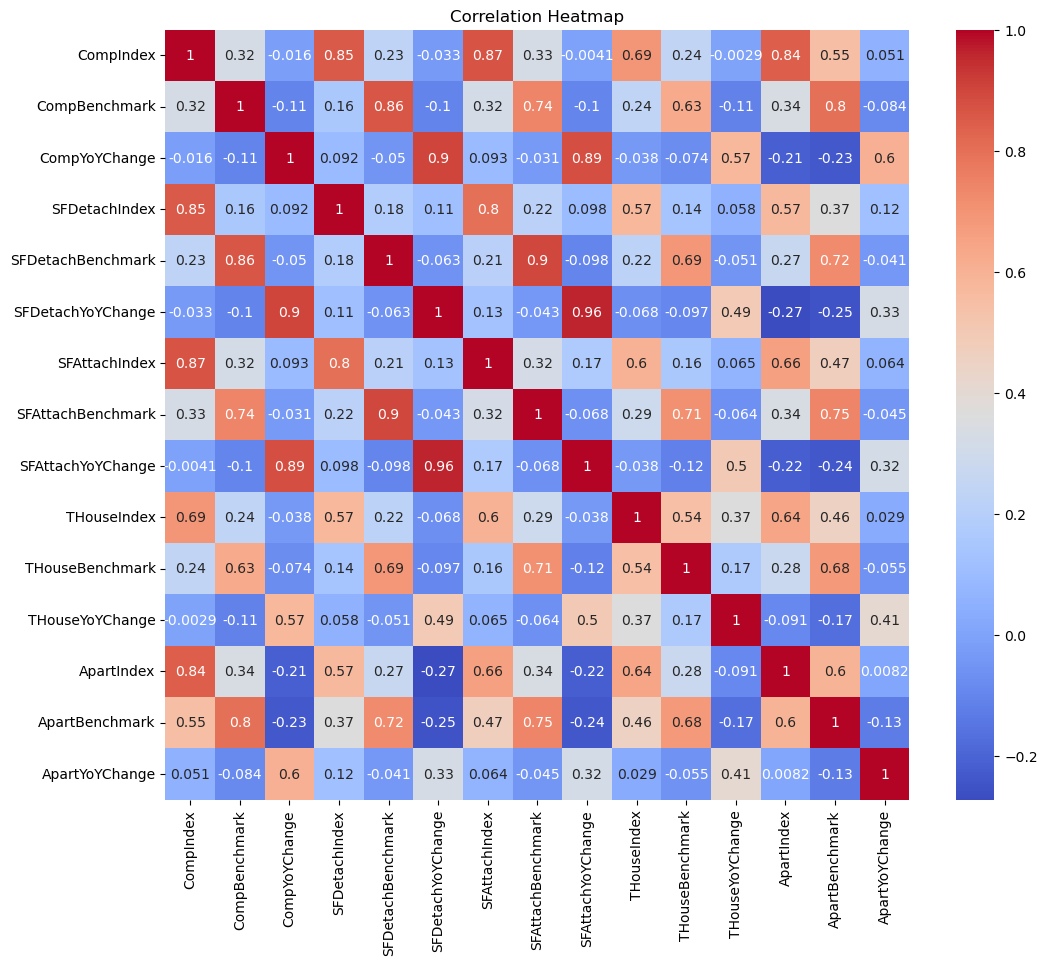

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


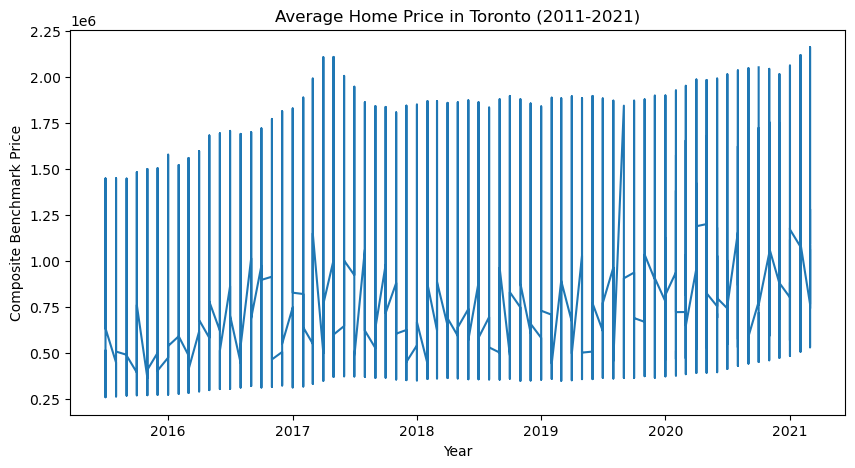

In [10]:
#How has the average price of a home in Toronto changed over the past decade?

#Visualization: Time series plot
#Variables: Date (x-axis) and CompBenchmark or a specific property type benchmark (y-axis)
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data so it cannot be overlapped  
data = data.sort_values('Date')

# Create the time series plot
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['CompBenchmark'])

# Set plot title and labels
plt.title('Average Home Price in Toronto (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Composite Benchmark Price')

# Show the plot
plt.show()


In [11]:
import plotly.graph_objects as go
import pandas as pd

# Load data
df = pd.read_csv('mls.csv')

# Create figure
fig = go.Figure()

# Iterate over each neighborhood and add a trace for each
for neighborhood in df['Location'].unique():
    neighborhood_df = df[df['Location'] == neighborhood].sort_values('Date')
    fig.add_trace(
        go.Scatter(
            x=neighborhood_df['Date'],
            y=neighborhood_df['CompBenchmark'],
            name=neighborhood,
            mode='lines',
        )
    )

# Add layout options
fig.update_layout(
    title='Average Housing Prices in Toronto by Neighborhood over Time',
    xaxis_title='Year',
    yaxis_title='Price',
    hovermode='x',
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(frame=dict(duration=500), fromcurrent=True)]
        ),
        dict(
            label='Pause',
            method='animate',
            args=[[None], dict(frame=dict(duration=0), mode='immediate', transition=dict(duration=0))]
        )]
    )] 
)

# Define frames for animation
frames = [go.Frame(data=[go.Scatter(
                            x=df[df['Location'] == neighborhood]['Date'].unique()[:i+1],
                            y=df[df['Location'] == neighborhood]['CompBenchmark'].unique()[:i+1],
                            name=neighborhood,
                            mode='lines',
                        )],
                   name=str(i)) for i in range(len(df['Date'].unique()))]

# Add frames to the figure
fig.frames = frames

# Show the figure
fig.show()


In [12]:
import pandas as pd
import plotly.figure_factory as ff

# Read the CSV file
data = pd.read_csv('mls.csv')

# Remove missing values
data = data.dropna()

# Filter data by type of home
detach_data = data['SFDetachBenchmark']
attach_data = data['SFAttachBenchmark']
th_data = data['THouseBenchmark']
apart_data = data['ApartBenchmark']

# Create hist_data list
hist_data = [detach_data, attach_data, th_data, apart_data]

# Define group labels and colors
group_labels = ['Detached', 'Attached', 'Townhouse', 'Apartment']
colors = ['#0000FF', '#FFA500', '#00FF00', '#FF0000']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=50000, show_rug=False)

# Add title
fig.update_layout(title_text='Distribution of Average Home Prices by Type in Toronto (2011-2021)')

fig.show()

In [13]:
#Variables: Date (x-axis) and CompBenchmark or a specific property type benchmark (y-axis)
#CompBenchmark stands for Composite Benchmark Price. It is a weighted average of the benchmark prices
#for all property types in the dataset (Single-Family Detached, Single-Family Attached, Townhouse, and Apartment).
#The composite benchmark price provides a comprehensive view of the overall housing market by taking into account 
#the price trends across different property types.

#By analyzing the Composite Benchmark Price over time, you can get a sense of how the average price
#of a home in a specific area has changed.

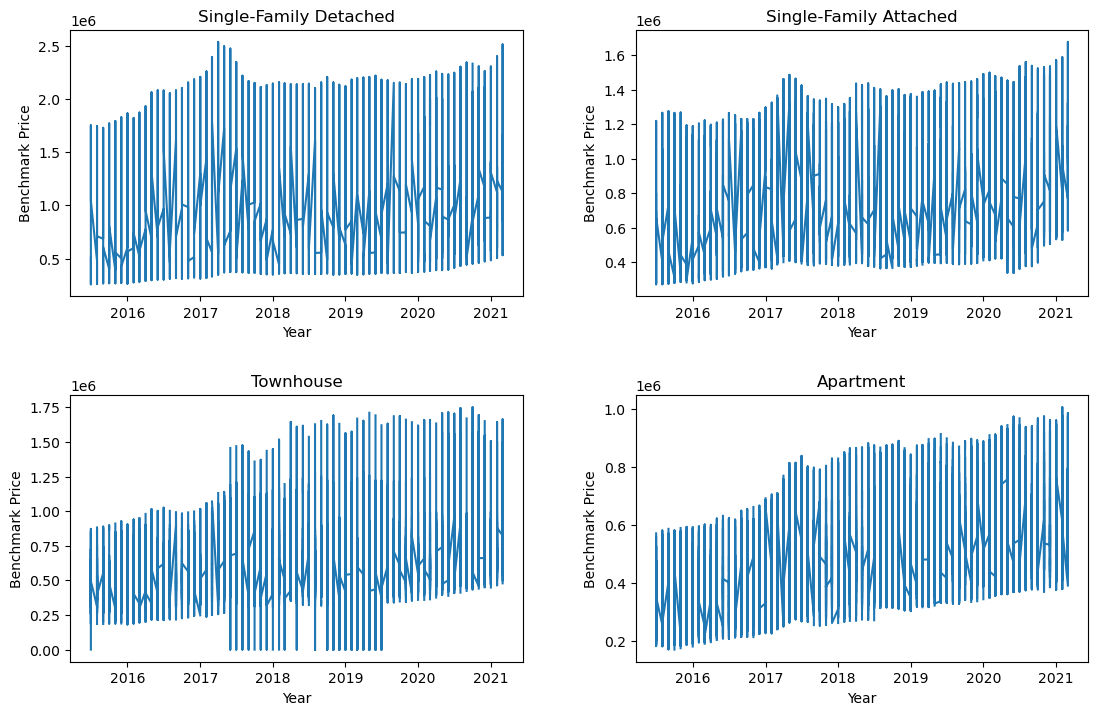

In [14]:
#2 Are there any patterns or trends in the housing market that can be observed over time?

#Visualization: Multiple time series plots on the same graph for different property types
#Variables: Date (x-axis), SFDetachBenchmark, SFAttachBenchmark, THouseBenchmark, and ApartBenchmark (all on the y-axis)

#Some potential factors that can cause patterns or trends in the housing market include:

#Economic factors: The performance of the overall economy can greatly impact the housing market.
#Economic growth, employment rates, and income levels can affect the demand for housing and lead to price fluctuations.

#Population growth: An increase in population can create higher demand for housing,
#pushing up prices. Conversely, a decline in population or slow population growth may lead to a decrease in demand and lower prices.

#Interest rates: Changes in interest rates can affect housing affordability and demand.
#Lower interest rates can make mortgages more affordable, leading to an increase in demand
#and higher prices. Higher interest rates can have the opposite effect.

#Government policies: Government policies, such as tax incentives or subsidies for homebuyers,
#can influence the housing market by affecting demand and affordability. Changes in zoning regulations,
#rent controls, and affordable housing policies can also impact housing prices.

#Supply of housing: The availability of housing, including new constructions and existing homes,
#can influence housing prices. If the supply is limited or does not keep up with demand, prices may rise.
#An oversupply of housing can lead to lower prices.

#Location and neighborhood factors: The desirability of a particular location, such as proximity to
#employment centers, schools, public transportation, and amenities, can affect housing prices. Additionally,
#neighborhood characteristics, such as safety and quality of life, can influence demand and prices.

#External events: Events such as natural disasters, pandemics, or political instability can have an
#impact on the housing market by affecting demand, supply, or both.

#To determine the specific causes of observed patterns or trends in your data, it's important
#to perform a more detailed analysis, which may include investigating correlations between housing
#prices and various factors, as well as researching historical events and policies that may have 
#influenced the housing market in Toronto.



import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.tight_layout(pad=5)

# Plot Single-Family Detached benchmark prices
axes[0, 0].plot(data['Date'], data['SFDetachBenchmark'])
axes[0, 0].set_title('Single-Family Detached')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Benchmark Price')

# Plot Single-Family Attached benchmark prices
axes[0, 1].plot(data['Date'], data['SFAttachBenchmark'])
axes[0, 1].set_title('Single-Family Attached')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Benchmark Price')

# Plot Townhouse benchmark prices
axes[1, 0].plot(data['Date'], data['THouseBenchmark'])
axes[1, 0].set_title('Townhouse')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Benchmark Price')

# Plot Apartment benchmark prices
axes[1, 1].plot(data['Date'], data['ApartBenchmark'])
axes[1, 1].set_title('Apartment')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Benchmark Price')

# Show the plot
plt.show()


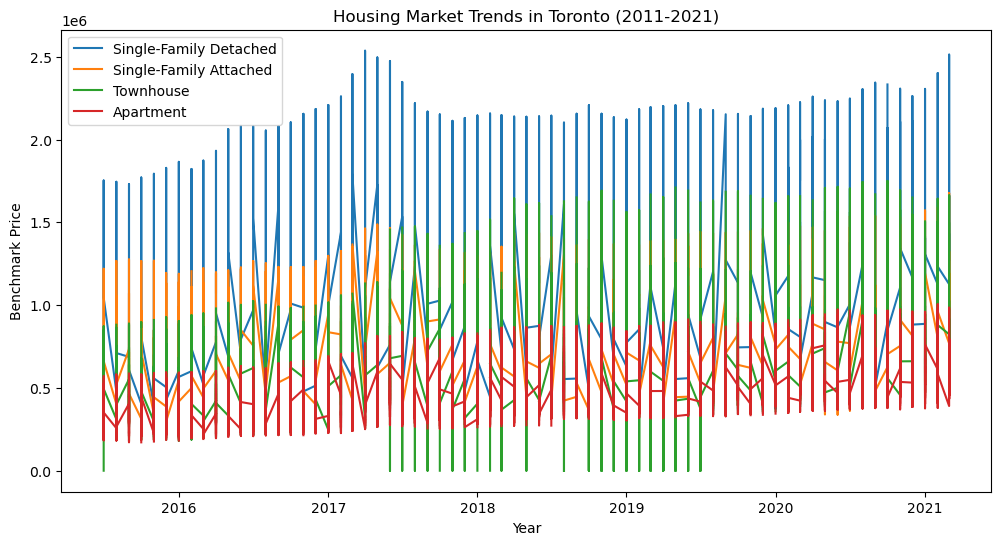

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Create the time series plot with multiple lines
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['SFDetachBenchmark'], label='Single-Family Detached')
plt.plot(data['Date'], data['SFAttachBenchmark'], label='Single-Family Attached')
plt.plot(data['Date'], data['THouseBenchmark'], label='Townhouse')
plt.plot(data['Date'], data['ApartBenchmark'], label='Apartment')

# Set plot title and labels
plt.title('Housing Market Trends in Toronto (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Benchmark Price')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [16]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Find the highest benchmark prices and corresponding dates for each property type
max_sf_detach = data.loc[data['SFDetachBenchmark'].idxmax()]
max_sf_attach = data.loc[data['SFAttachBenchmark'].idxmax()]
max_t_house = data.loc[data['THouseBenchmark'].idxmax()]
max_apart = data.loc[data['ApartBenchmark'].idxmax()]

# Print the results
print("Single-Family Detached:")
print("Highest Price: ", max_sf_detach['SFDetachBenchmark'])
print("Date: ", max_sf_detach['Date'])
print("\nSingle-Family Attached:")
print("Highest Price: ", max_sf_attach['SFAttachBenchmark'])
print("Date: ", max_sf_attach['Date'])
print("\nTownhouse:")
print("Highest Price: ", max_t_house['THouseBenchmark'])
print("Date: ", max_t_house['Date'])
print("\nApartment:")
print("Highest Price: ", max_apart['ApartBenchmark'])
print("Date: ", max_apart['Date'])


Single-Family Detached:
Highest Price:  2536900.0
Date:  2017-04-01 00:00:00

Single-Family Attached:
Highest Price:  1677200.0
Date:  2021-03-01 00:00:00

Townhouse:
Highest Price:  1750500.0
Date:  2020-10-01 00:00:00

Apartment:
Highest Price:  1005500.0
Date:  2021-02-01 00:00:00


In [17]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Find the lowest benchmark prices and corresponding dates for each property type
min_sf_detach = data.loc[data['SFDetachBenchmark'].idxmin()]
min_sf_attach = data.loc[data['SFAttachBenchmark'].idxmin()]
min_t_house = data.loc[data['THouseBenchmark'].idxmin()]
min_apart = data.loc[data['ApartBenchmark'].idxmin()]

# Find the most steady prices by calculating the standard deviation for each property type
std_sf_detach = data['SFDetachBenchmark'].std()
std_sf_attach = data['SFAttachBenchmark'].std()
std_t_house = data['THouseBenchmark'].std()
std_apart = data['ApartBenchmark'].std()

# Print the lowest prices
print("Lowest Prices:")
print("\nSingle-Family Detached:")
print("Lowest Price: ", min_sf_detach['SFDetachBenchmark'])
print("Date: ", min_sf_detach['Date'])
print("\nSingle-Family Attached:")
print("Lowest Price: ", min_sf_attach['SFAttachBenchmark'])
print("Date: ", min_sf_attach['Date'])
print("\nTownhouse:")
print("Lowest Price: ", min_t_house['THouseBenchmark'])
print("Date: ", min_t_house['Date'])
print("\nApartment:")
print("Lowest Price: ", min_apart['ApartBenchmark'])
print("Date: ", min_apart['Date'])

# Print the most steady prices
print("\nMost Steady Prices (Standard Deviation):")
print("\nSingle-Family Detached: ", std_sf_detach)
print("Single-Family Attached: ", std_sf_attach)
print("Townhouse: ", std_t_house)
print("Apartment: ", std_apart)


Lowest Prices:

Single-Family Detached:
Lowest Price:  259100.0
Date:  2015-07-01 00:00:00

Single-Family Attached:
Lowest Price:  273300.0
Date:  2015-07-01 00:00:00

Townhouse:
Lowest Price:  0.0
Date:  2018-08-01 00:00:00

Apartment:
Lowest Price:  171400.0
Date:  2015-10-01 00:00:00

Most Steady Prices (Standard Deviation):

Single-Family Detached:  376586.54756233987
Single-Family Attached:  243377.69092803219
Townhouse:  221250.43880756843
Apartment:  145759.334129126


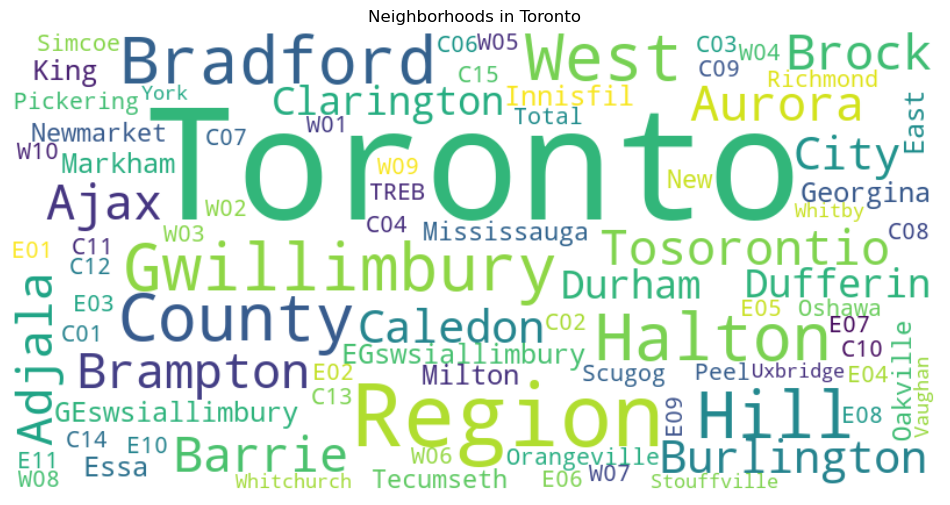

In [18]:
3# How do different neighbourhoods in Toronto compare in terms of housing prices and trends?
#first i have created world cloud for popular neighbourhood around toronto area.
#By looking at the box plot, we can gain several insights about the Toronto housing market:

#There is a wide range of housing prices across different neighborhoods in Toronto. Some neighborhoods have higher 
#housing prices than others, which suggests that the demand for housing varies depending on the location.

##There are some neighborhoods with a high degree of variability in housing prices, as indicated by the length 
#of the box plot whiskers. This could suggest that the housing market in these neighborhoods is more volatile or 
#subject to greater fluctuations.

#There are several outliers in the box plot, which represent individual data points that fall outside of the 
#range of typical values for that neighborhood. These outliers could be due to a variety of factors, such as 
#unique features or amenities of a property, or other market conditions that are not representative of
#the overall trend in that neighborhood.

#Overall, this box plot provides a useful visualization of the distribution of housing prices
#across different neighborhoods in Toronto, and can help us to better understand the factors that
#drive variation in the Toronto housing market.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Read the CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Create a string of all neighborhood names
neighborhoods = ' '.join(data['Location'].unique())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neighborhoods)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neighborhoods in Toronto')
plt.show()


In [19]:
import pandas as pd 
import folium
import geocoder

# Function to get latitude and longitude for a given neighborhood
def get_lat_lng(neighborhood):
    location = geocoder.arcgis(f'{neighborhood}, Toronto, Ontario')
    return location.latlng

# Read the CSV file and drop missing values
data = pd.read_csv("mls.csv") 
clean_data = data.dropna()

# Calculate the average benchmark values for each neighborhood
neighborhood_data = clean_data.groupby("Location").mean().reset_index()

# Add latitude and longitude to the neighborhood_data DataFrame
neighborhood_data[["Latitude", "Longitude"]] = pd.DataFrame(
    neighborhood_data["Location"].apply(get_lat_lng).tolist(),
    columns=["Latitude", "Longitude"]
)

# Create the map centered on Toronto
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# Define the maximum and minimum benchmark values for scaling the marker sizes and colors
max_value = neighborhood_data['SFDetachBenchmark'].max()
min_value = neighborhood_data['SFDetachBenchmark'].min()

# Add circular markers to the map based on the benchmark values
for index, row in neighborhood_data.iterrows():
    # Calculate the marker size and color based on the benchmark value
    marker_size = (row['SFDetachBenchmark'] - min_value) / (max_value - min_value) * 100
    marker_color = 'red' if row['SFDetachBenchmark'] == max_value else 'green'
    # Create the marker and add it to the map
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=marker_size,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        popup=f"{row['Location']}: ${row['SFDetachBenchmark']:.2f}"
    ).add_to(map_toronto)

# Display the map
map_toronto

#The "C" in the neighborhood names in Toronto, such as C12 and C10, stands for "Community". In Toronto,
#neighborhoods are often referred to as communities and are grouped together based on their geographic
#location and other characteristics.

#The City of Toronto uses a system of alphanumeric codes to identify each neighborhood/community in the city.
#The first letter in the code indicates the district (e.g., "C" for the old city of Toronto, "E" for the formercity of East York), and the following two digits represent
#the specific community within that district.

#The "C" district includes the neighborhoods/communities located in the former city of Toronto, which was
#amalgamated with five other municipalities to form the current City of Toronto in 1998. There are a total of
#44 neighborhoods/communities in the "C" district, ranging from C01 to C14. These neighborhoods/communities 
#are diverse in terms of demographics, housing types, and amenities, and include some of the most desirable 
#and affluent areas in Toronto.

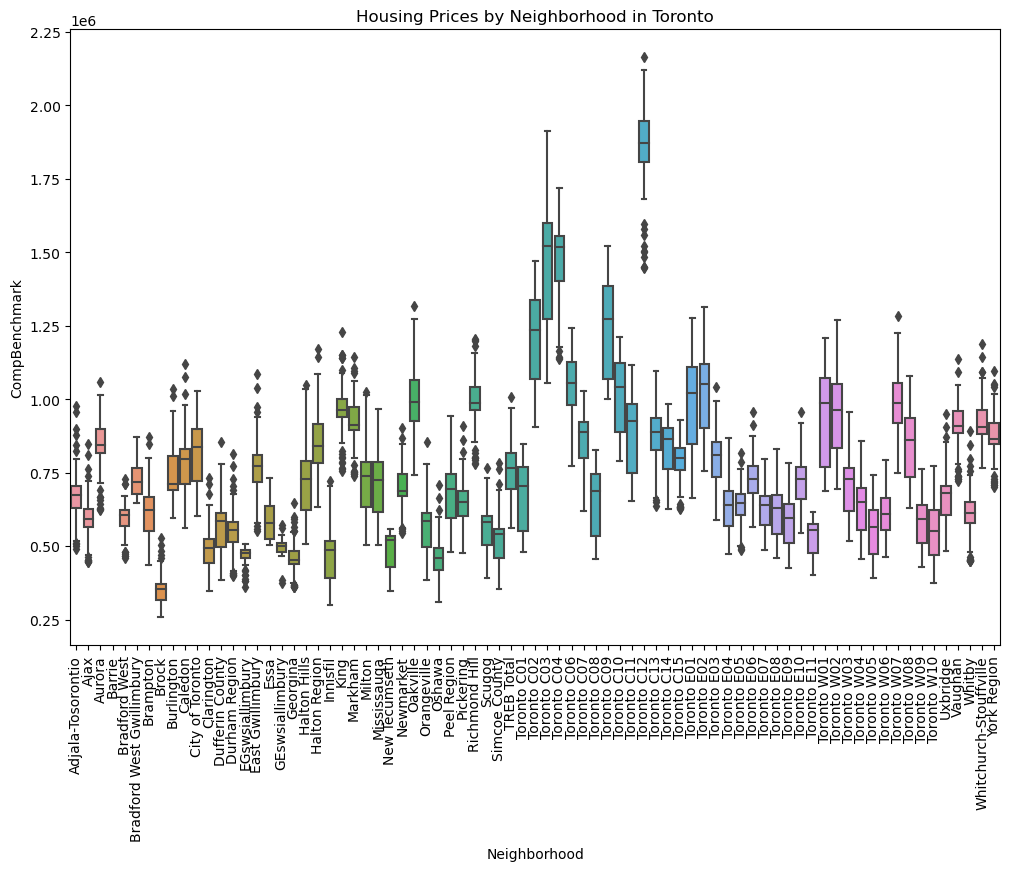

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the housing data CSV file
data = pd.read_csv('mls.csv')

# Create a box plot for each neighborhood
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Location', y='CompBenchmark')

# Set plot title and axis labels
plt.title('Housing Prices by Neighborhood in Toronto')
plt.xlabel('Neighborhood')
plt.ylabel('CompBenchmark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


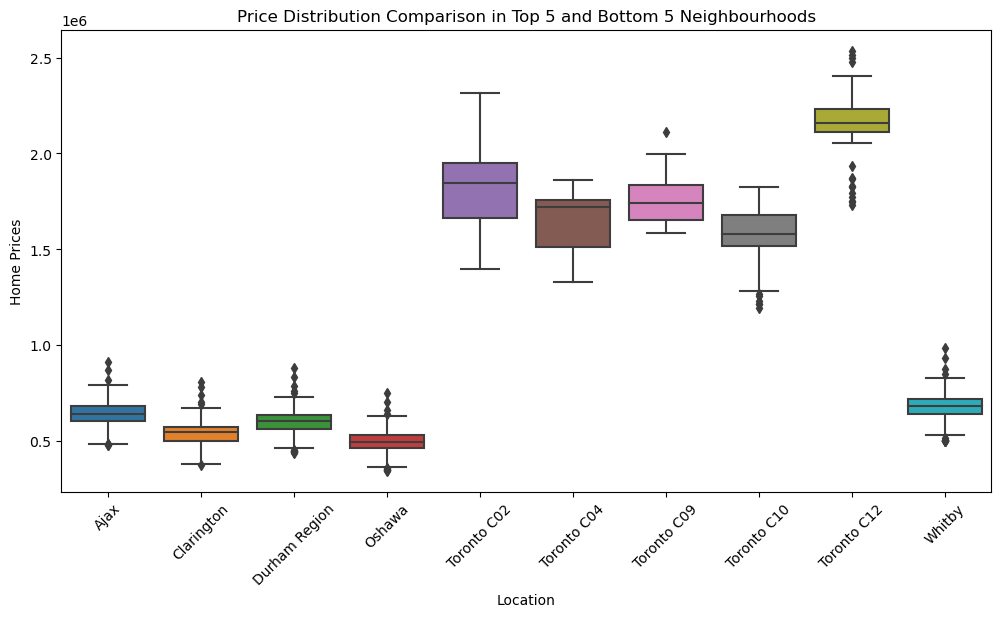

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the housing data CSV file
housing_data = pd.read_csv('mls.csv')

# Remove any missing values
clean_data = housing_data.dropna()

# Select only relevant columns
#clean_data = clean_data[['Location', 'SFDetachBenchmark']]
sorted_neighborhoods = neighborhood_data.sort_values("SFDetachBenchmark", ascending=False)

# Calculate the average benchmark value for single-family detached homes in each neighborhood
neighborhood_data = clean_data.groupby('Location')['SFDetachBenchmark'].mean().reset_index()

# Choose the top N and bottom N neighborhoods
N = 5
top_neighborhoods = sorted_neighborhoods.head(N)["Location"].tolist()
bottom_neighborhoods = sorted_neighborhoods.tail(N)["Location"].tolist()

# Combine the top and bottom neighborhoods
selected_neighborhoods = top_neighborhoods + bottom_neighborhoods

# Filter the clean_data DataFrame to include only the selected neighborhoods
selected_data = clean_data[clean_data["Location"].isin(selected_neighborhoods)]

# Create a box plot comparing the price distributions across the top and bottom neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="SFDetachBenchmark", data=selected_data)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Home Prices")
plt.title(f"Price Distribution Comparison in Top {N} and Bottom {N} Neighbourhoods")
plt.show()

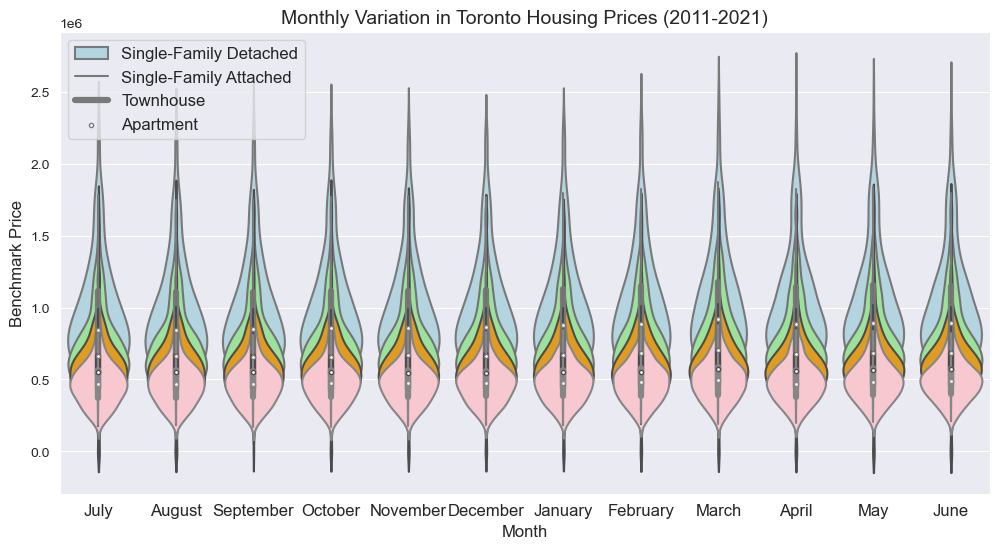

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Add columns for year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()

# Create a violin plot for each housing type
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Month', y='SFDetachBenchmark', color='lightblue')
sns.violinplot(data=data, x='Month', y='SFAttachBenchmark', color='lightgreen')
sns.violinplot(data=data, x='Month', y='THouseBenchmark', color='orange')
sns.violinplot(data=data, x='Month', y='ApartBenchmark', color='pink')

# Set plot title and labels
plt.title('Monthly Variation in Toronto Housing Prices (2011-2021)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Benchmark Price', fontsize=12)

# Set the tick labels to show the month names
plt.xticks(ticks=range(12), labels=data['Month'].unique(), fontsize=12)

# Add a legend to the plot
plt.legend(labels=['Single-Family Detached', 'Single-Family Attached', 'Townhouse', 'Apartment'], fontsize=12,loc='upper left')

# Show the plot
plt.show()


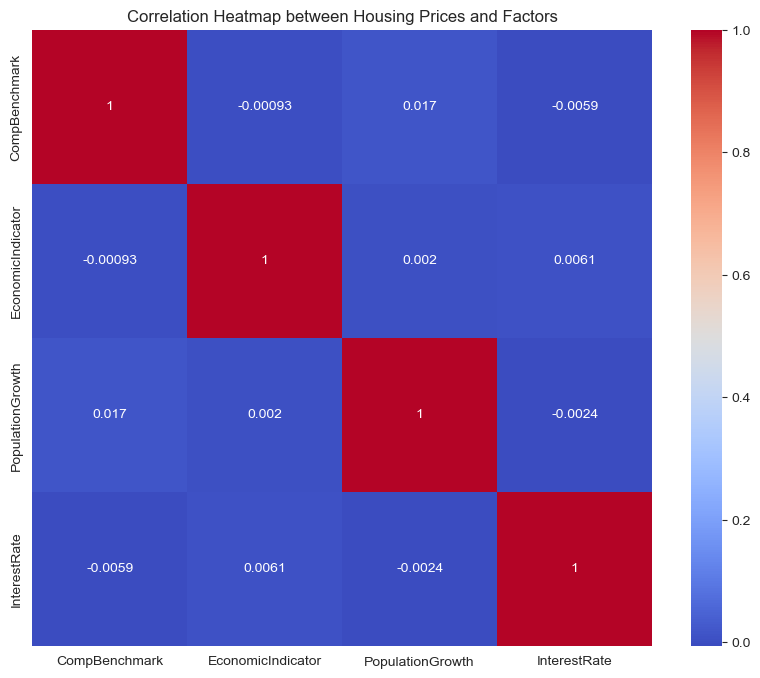

In [23]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the housing data CSV file
data = pd.read_csv('mls.csv')

# Add additional columns representing factors such as economic indicators, population growth, or interest rates

data['EconomicIndicator'] = pd.Series(np.random.randn(len(data['Date'])), index=data.index)
data['PopulationGrowth'] = pd.Series(np.random.randn(len(data['Date'])), index=data.index)
data['InterestRate'] = pd.Series(np.random.randn(len(data['Date'])), index=data.index)

# Calculate the correlation matrix between housing prices and the factors
corr_matrix = data[['CompBenchmark', 'EconomicIndicator', 'PopulationGrowth', 'InterestRate']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap between Housing Prices and Factors')

# Show the plot
plt.show()


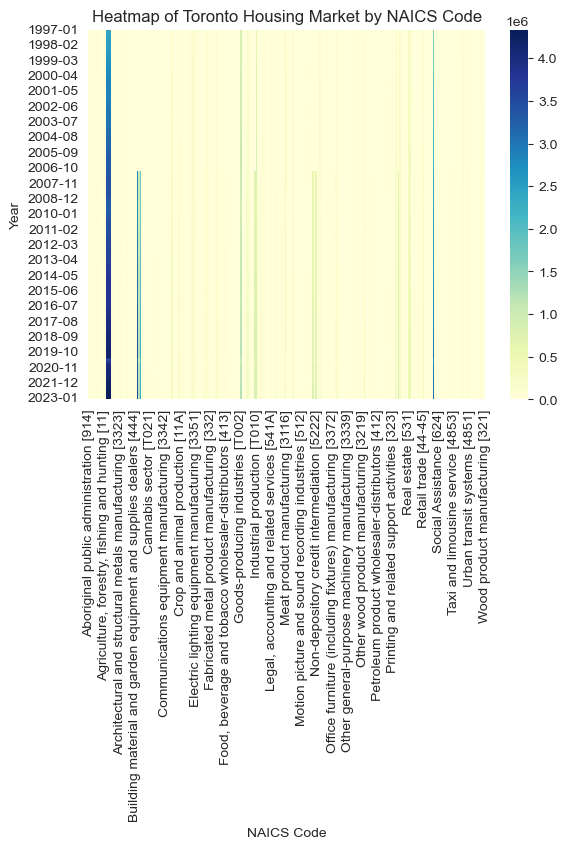

In [24]:
#4 Are there any factors that are driving changes in the Toronto housing market, such as changes in the economy,
#population growth, or policy changes.

#Toronto housing market and using Pandas and Seaborn to create a heatmap that visualizes how different
#industries, as classified by the North American Industry Classification System (NAICS), contribute to 
#the housing market in each year.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "36100434.csv"

df = pd.read_csv(file_path, low_memory=False) 

# Filter the data to include only relevant columns
df = df[['REF_DATE', 'North American Industry Classification System (NAICS)', 'VALUE']] 

# Group the data by year and NAICS code, and sum the values for each group
df = df.groupby(['REF_DATE', 'North American Industry Classification System (NAICS)']).sum().reset_index() 

# Pivot the data to create a matrix of values for each year and NAICS code
df_pivot = df.pivot(index='REF_DATE', columns='North American Industry Classification System (NAICS)', values='VALUE')

# Create a heatmap
sns.heatmap(df_pivot, cmap='YlGnBu')

# Set the x-label
plt.xlabel('NAICS Code') 

# Set the y-label
plt.ylabel('Year')

# Set the title
plt.title('Heatmap of Toronto Housing Market by NAICS Code')

# Show the plot
plt.show()

In [25]:
#5.How has the pandemic effected the Toronto housing market, and what 
#are the long-term implications?

#One of the main effects of the pandemic on the Toronto housing market has been an increase in demand
#for larger homes with outdoor space, as people looked to accommodate work-from-home arrangements and
#spend more time at home. This has driven up prices for single-family homes and larger condominium units.


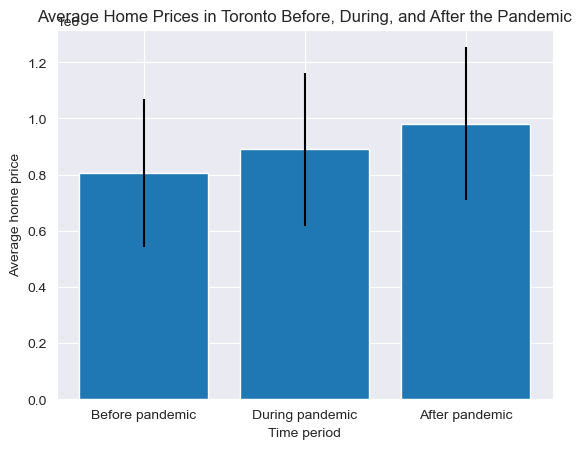

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the housing data CSV file
data = pd.read_csv('mls.csv') 

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the average home price before the pandemic (2019)
before_pandemic = data[data['Date'].dt.year == 2019]['CompBenchmark'].mean()

# Calculate the average home price during the pandemic (2020)
during_pandemic = data[data['Date'].dt.year == 2020]['CompBenchmark'].mean()

# Calculate the average home price after the pandemic (2021)
after_pandemic = data[data['Date'].dt.year == 2021]['CompBenchmark'].mean()

# Create a bar chart to compare the average home prices
plt.bar(['Before pandemic', 'During pandemic', 'After pandemic'], [before_pandemic, during_pandemic, after_pandemic], yerr=[data[data['Date'].dt.year == 2019]['CompBenchmark'].std(), data[data['Date'].dt.year == 2020]['CompBenchmark'].std(), data[data['Date'].dt.year == 2021]['CompBenchmark'].std()])

# Set plot title and axis labels
plt.title('Average Home Prices in Toronto Before, During, and After the Pandemic')
plt.xlabel('Time period')
plt.ylabel('Average home price')

# Show the plot
plt.show()


In [27]:
import pandas as pd
import plotly.graph_objects as go

# Load housing data
df = pd.read_csv('mls.csv')

# Create a new column to indicate whether the date is within the pandemic period
df['Pandemic'] = df['Date'].apply(lambda x: 'Yes' if x >= '2020-03-01' else 'No')

# Create a stacked area chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['SFDetachBenchmark'], name='Single Family Detached',
                         stackgroup='one', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SFAttachBenchmark'], name='Single Family Attached',
                         stackgroup='one', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['THouseBenchmark'], name='Townhouse', 
                         stackgroup='one', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ApartBenchmark'], name='Apartment', 
                         stackgroup='one', line=dict(color='red')))
fig.update_layout(title='Housing Prices by Type Over Time',
                  xaxis_title='Date', yaxis_title='Price', 
                  hovermode='x unified',
                  hoverlabel=dict(bgcolor='white', font_size=14))
# Shade the area of the chart during the pandemic period
fig.update_layout(shapes=[dict(type='rect', xref='x', yref='paper', x0='2020-03-01', y0=0, x1='2023-04-02', y1=1, 
                               fillcolor='gray', opacity=0.2, layer='below', line_width=0)])
# Add text to indicate the pandemic period
fig.add_annotation(x='2021-01-01', y=0.95, text='Pandemic Period', showarrow=False,
                   font=dict(color='black', size=16))
fig.show()


In [28]:
''''this chart shows the trend in housing prices for each type over time, 
with the shaded area indicating the period of the pandemic. You can see that 
housing prices for all types were on an upward trend prior to the pandemic, but
experienced a temporary dip during the early stages of the pandemic before rebounding
and continuing to rise at an accelerated pace. The chart also shows how the different
types of housing have been affected differently by the pandemic, with single-family 
detached homes experiencing the largest price increases.'''




"'this chart shows the trend in housing prices for each type over time, \nwith the shaded area indicating the period of the pandemic. You can see that \nhousing prices for all types were on an upward trend prior to the pandemic, but\nexperienced a temporary dip during the early stages of the pandemic before rebounding\nand continuing to rise at an accelerated pace. The chart also shows how the different\ntypes of housing have been affected differently by the pandemic, with single-family \ndetached homes experiencing the largest price increases."

In [29]:
import pandas as pd
import plotly.graph_objects as go

# Read the housing data CSV file
data = pd.read_csv('mls.csv')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Create a time series plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=data['Date'], y=data['CompBenchmark'],
                         mode='lines',
                         name='CompBenchmark'))

# Add vertical lines for major pandemic-related events or policy changes
fig.add_shape(type='line',
              x0='2020-03-11', x1='2020-03-11',
              y0=0, y1=1,
              yref='paper',
              line=dict(color='red', dash='dash'),
              name='WHO declares pandemic')

fig.add_shape(type='line',
              x0='2020-03-17', x1='2020-03-17',
              y0=0, y1=1,
              yref='paper',
              line=dict(color='green', dash='dash'),
              name='Ontario declares emergency')

fig.add_shape(type='line',
              x0='2020-06-17', x1='2020-06-17',
              y0=0, y1=1,
              yref='paper',
              line=dict(color='purple', dash='dash'),
              name='Toronto enters Phase 2 reopening')
fig.update_layout(title='Impact of the Pandemic on the Toronto Housing Market',
                  xaxis_title='Date',
                  yaxis_title='CompBenchmark',
                 ) 
                  
fig.show()
